In [1]:
import networkx as nx #import module named networkx abbreviated as nx
# networkx is very useful for network visualization and network optimization

In [2]:
G = nx.Graph() #introduce an empty network (graph) named G.
# in the rest of this code cell, we will define the network
# from slide 14 of Lecture 19, by adding one edge (or arc) at a time
G.add_edge(1,2, weight = 4)
G.add_edge(1,4, weight = 3)
G.add_edge(1,6, weight = 2)
G.add_edge(2,3, weight = 7)
G.add_edge(2,4, weight = 5)
G.add_edge(2,5, weight = 6)
G.add_edge(4,5, weight = 6)
G.add_edge(4,6, weight = 2)

In [3]:
T = nx.minimum_spanning_tree(G) #the function nx.minimum_spanning_tree
#implements Kruskal's agorithm (pseudo-code on slide 13 Lecture 19)
#to identify to Min Span Tree 9MST) of network (graph) G

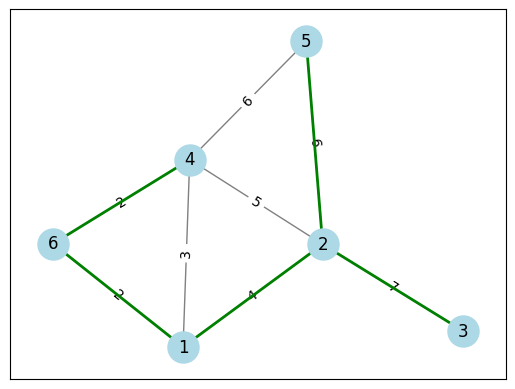

In [4]:
# Visualize the graph and the minimum spanning tree
pos = nx.nx_pydot.pydot_layout(G) #optimize the positions (pos) of the nodes based on "pydot_layout"
#to visualize network G
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500) #draw the nodes of G according to the position "pos"
nx.draw_networkx_edges(G, pos, edge_color="grey") #draw the edges of network G with the color grey
nx.draw_networkx_labels(G, pos, font_size=12) #draw the labels of the nodes inside the circles
# note: our nodes are labeled as 1,2,3,4,5,6. We could have used different labels, for example, "Miami", "London", "Paris"...
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)}) # each edge
# is labeled according to its weight. For example, edge (5,6) is labeled with the number 6. Draw these labels in the visualization of the graph.
nx.draw_networkx_edges(T, pos, edge_color="green", width=2) #highlight on the exiasting

In [5]:
print('number of arcs in MST:', T.size())
print('total weight of MST:',T.size(weight='weight'))

number of arcs in MST: 5
total weight of MST: 21.0


PROBLEM 2- MF

In [6]:
import networkx as nx
import pandas as pd
c=pd.read_excel('MackenzieDrydenFinal.xlsx','Prob2a)',index_col=0)
print(c)
columns=c.columns #equivalently, cities = c.index
print(columns)

FileNotFoundError: [Errno 2] No such file or directory: 'MackenzieDrydenFinal.xlsx'

In [ ]:
G = nx.DiGraph() #create an empty Directed Graph (DiGraph)

for i in columns: #for each pair of cities i and j
    for j in columns:
      if c.loc[i,j] > 0: # if arc/edge (i,j) exists:
          G.add_edge(i,j,capacity=c.loc[i,j]) # add arc/edge to G with capacity c.loc[i,j]

In [ ]:
pos = nx.nx_pydot.pydot_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["capacity"] for u, v, d in G.edges(data=True)}
)

In [ ]:
flow_value, flow_dict = nx.maximum_flow(G, columns[0], columns[-1])
# the functino nx.maximum_flow implemets the "Ford-Fulkerson" algorithm (not simplex)
# to identify on network/graph G the maximum flow from
# Boston=cities[0]= ]first city in the list of cities'
#to
# Dallas=cities[-1]= "last city in the list of cities"=cities[en(cities)-1]

#the function nx.maximum_flow has two outputs:
#1) flow_value -> the optimal objective function, i.e., the max flow from Boston to Dallas
#2) flow_dict _> the optimal solution, i.e., the detailed flow throuhgout the network

print('Max Flow:', flow_value)
print(flow_dict)

In [ ]:
#make use of a for-loop and print function to understand better
#the nature of this variable named "flow_dict" of type "dictionary"

for i in columns:
  print(i)
  print(flow_dict[i])

In [ ]:
#define G1 to be the graph representing the max flow on G
G1 = nx.DiGraph() #creat the empty directed graph
for i in columns[:len(columns)-1]: # for every city i besides Dallas (the last key)
  temp_dict=flow_dict[i] #create a temporary variable of type dictionary
  #to representt he flow out of city i
  temp_keys = list(temp_dict.keys()) #create a temporary variable of type list
  # listinf all the cities that that ship to from city i
  for j in temp_keys: #for every j in temp_keys
    flow = temp_dict[j]
    G1.add_edge(i,j,capacity=flow) # add an arc/edge (i,j) with capacity = optimal flow from i to j

In [ ]:
#visualize G1
nx.draw_networkx_nodes(G1, pos, node_color="lightblue", node_size=500)
nx.draw_networkx_edges(G1, pos, edge_color="grey")
nx.draw_networkx_labels(G1, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(
    G, pos, edge_labels={(u, v): d["capacity"] for u, v, d in G1.edges(data=True)}
)

PROB 2 - SP

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
b=pd.read_excel('MackenzieDrydenFinal.xlsx','Prob2a)',index_col=0)
print(b)

In [ ]:
#b.columns = b.index
G=nx.DiGraph() #DiGraph represents a directed graph. The arcs have a specific direction.
# create an empty directed graph named G, and add the edges of this graph.
# through a double for-loop
for i in b.index: #for every pair of nodes (i,j)
    for j in b.columns:
       if b.loc[i,j] > 0: # if arc (i,j) exists (if the corresponding weight in the adjacency matrix is not zero)
          G.add_edge(i,j, weight=b.loc[i,j]) #add arc (or edge) (i,j) in graph G with corresponding weight

In [ ]:
## in this code cell, we visualize the graph G
#using the same (or similar) code from Lecture 19
pos = nx.nx_pydot.pydot_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="orange", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="black", arrowsize=16)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})

In [ ]:
G.remove_node('E')
p = nx.shortest_path(G, source=b.index[0], target=b.index[-1], weight = 'weight')
# the function nx.shortest_path implements Dijkstra Algorithm to solve the shortest path problem
#on graph G, with origin=souce=b.index[0] (i.e., the first node in this network >> entrance)
## and destination=target=b.index[-1] (i.e., the last node of this network)
print(p)

In [ ]:
print('optimal path:')
length = 0
for i in range(len(p)-1):
  print('from', p[i], 'to', p[i+1])
  length += b.loc[p[i],p[i+1]]
print('length of shortest path is:', length)

In [ ]:
G1 = nx.DiGraph() #G1 is the graph representing the shortest path
for i in range(len(p)-1): #for every node i in the shortest path
    G1.add_edge(p[i],p[i+1], weight=b.loc[p[i],p[i+1]]) #add arc/edge p[i],p[i+j]} with the corresponding weight.

In [ ]:
print(G1.size())
print(G1.size(weight='weight'))

In [ ]:
# Visualize the graph and higlight the shortest path
pos = nx.nx_pydot.pydot_layout(G)
nx.draw_networkx_nodes(G, pos, node_color="orange", node_size=500)
nx.draw_networkx_edges(G, pos, edge_color="black", arrowsize=16)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_edges(G1, pos, edge_color="green", width=2)

PROB 3- BM as MF

In [ ]:
!pip install gurobipy  # install gurobipy, and import pandas
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
p=pd.read_excel('MackenzieDrydenFinal.xlsx', 'Problem 3 - data',index_col=0)
I=p.index
J=p.columns

In [ ]:
WLSACCESSID='f82b7a07-ff88-4c3c-a80a-2d32ce2981d2'
WLSSECRET='921accb3-976b-4ed4-a898-1b8bd2401237'
LICENSEID=2587233 ## do not need to put a license
## make sure to put in quotes

In [ ]:
# Create an environment with your WLS license
e = gp.Env(empty=True)
e.setParam('WLSACCESSID', WLSACCESSID)
e.setParam('WLSSECRET', WLSSECRET)
e.setParam('LICENSEID', LICENSEID) ## don't need to use this if no license
e.start()

In [ ]:
m = gp.Model(env=e) #compare to m = gp.Model() for problems with less than 2000 variables

# Define sets
I = p.index  # users
J = p.columns  # ads

# Create variable for each student i and dorm j
x = m.addVars(I,J,vtype=GRB.BINARY)

m.setObjective( gp.quicksum( p.loc[i,j] * x[i,j] for i in I for j in J ), GRB.MAXIMIZE )

m.addConstrs( gp.quicksum( x[i,j] for j in J ) <= 1 for i in I )

m.addConstrs( gp.quicksum( x[i,j] for i in I ) <= 160 for j in J )

# Solve
m.optimize()

networkx

In [ ]:
print("Objective:",m.objVal)

print("\nSolution:\n")

for i in I:
    for j in J:
        if x[i,j].x>0.05:
            print(i,": ", j)

In [ ]:
import networkx as nx
import pandas as pd
p=pd.read_excel('MackenzieDrydenFinal.xlsx', 'Problem 3 - data',index_col=0)
users = p.index
ads = p.columns
n=len(users)
m=len(ads)
print(n,m)

In [ ]:
G = nx.DiGraph()
for i in users:
    G.add_edge('source',i, capacity=1)
for i in users:
    for j in ads:
       G.add_edge(i,j, capacity=p.loc[i,j])
for j in ads:
    G.add_edge(j,'terminal', capacity=n/m)

flow_value, flow_dict = nx.maximum_flow(G, 'source', 'terminal')

In [ ]:
print(flow_value)

In [ ]:
#print on screen users assigned to a ads of their preference
for i in users:
  for j in ads:
    if flow_dict[i][j] == 1:
      print(i,j)

In [ ]:
#print on screen users that do not get assigned to a ads
for i in users:
   if flow_dict['source'][i] == 0:
     print(i)

In [ ]:
for i in ads:
  print(i,flow_dict[i]['terminal'])